# Теория вероятностей и математическая статистика

* 8 вебинаров, 4 недели.
* В конце курса — проектная работа (подробнее на занятии 6).
* Срок сдачи домашек на портале — до начала следующего занятия.
* Если не успеваете — по договорённости можно ставить заглушки.
    - Через месяц все заглушки снимаются.
    - По готовности домашки надо мне написать.
* Домашки удобнее всего сдавать в jupyter-ноутбуках:
    - через github
    - через google colaboratory
    - файлом
* Домашки нужно оформлять подробно, чтобы можно было проследить ход рассуждения.
* Что стоит знать к этому курсу:
    - python (`numpy`, `pandas`)
    - математика (на общем уровне; к концу курса пригодится понимание, как работать с векторами и матрицами: [мой вебинар про это](https://geekbrains.ru/events/1248))

# Урок 1

## Случайные события. Условная вероятность. Формула Байеса.  Независимые испытания

### Случайные события

__Случайное событие__ — любой исход опыта, который может произойти или не произойти.

Например,
1. При броске двух игральных костей на одной выпало число $1$, а на другой — $2$.
2. Клиент банка не вернул кредит.
3. Температура воздуха в Москве за последние десять дней не превышала $29$ градусов по Цельсию.

Пусть $A$ и $B$ — случайные события.
* __Сумма__ событий $A + B$ соответствует наступлению хотя бы одного из событий $A$ и $B$. Такое событие иногда называют __объединением__.
* __Произведение__ $A \cdot B$ соответствует наступлению событий $A$ и $B$ одновременно. Такое событие ещё называется __совместным__.
* __Отрицание__ $\overline{A}$ соответствует тому, что событие $A$ не наступило. Такое событие также называется __дополнением__.

Событие называется __достоверным__, если в результате испытания оно обязательно произойдёт. 

Например,
1. На игральной кости выпало число, не превышающее $6$.
2. Подбросили монету, и выпал либо орёл, либо решка.
3. Монету подбросили стократно, и решка выпала не более $100$ раз.

Наоборот, __невозможным событием__ мы называем событие, которое никогда не произойдёт.

Например,
1. Две игральные кости бросили один раз, и сумма выпавших чисел составила $15$.
2. Монету подбросили стократно, и решка выпала $55$ раз, а орёл — $56$.

__Совместными__ называются события, которые могут произойти вместе. Соответственно, __несовместными__ называются события, которые вместе случиться не могут.

Например,
* При броске монеты не могут одновременно выпасть орёл и решка.
* При броске дротика в круглую мишень можно попасть одновременно в правую половину мишени и в нижнюю половину.

### Статистическая вероятность

__Относительная частота__ случайного события — это отношение количества испытаний, в которых данное событие состоялось, к общему числу испытаний:
$$W(A) = \frac{m}{n},$$
где
* $m$ — число испытаний, в результате которых произошло событие $A$,
* $n$ — общее число испытаний.

__Пример 1__

Смоделируем $60$-кратное подбрасывание игральной кости с помощью функции `randint` из модуля `numpy.random`. В этом случае $n = 60$.

Событием $A$ будем считать выпадение числа $3$. Сперва найдём его относительную частоту.

In [1]:
import numpy as np

In [16]:
n = 60

b = np.random.randint(1, 7, size=n)

print(b)

[3 5 1 5 2 6 1 5 1 6 5 1 6 4 1 4 4 5 6 6 3 1 1 3 4 2 6 2 4 5 6 2 6 4 1 6 6
 3 6 6 6 1 5 5 4 6 2 1 1 2 1 5 1 2 1 2 5 4 1 4]


Вычислим мощность подмножества, где наблюдалось событие $A$, т.е. выпадало число $3$:

In [17]:
b == 3

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [18]:
m = (b == 3).sum()

m

4

Итак, относительная частота события $A$:

In [19]:
W = m / n

print(W)

0.06666666666666667


_Замечание_: здравый смысл подсказывает, что вероятность такого события равна $1 / 6$:

In [11]:
1 / 6

0.16666666666666666

__Пример 2__

Разберём более сложный пример. Смоделируем ситуацию, когда бросают две игральные кости одновременно.

При этом будем находить частоту случайного события $B$, при котором на первой кости выпало $1$, а на второй — $2$. 

Проведём для этого $360$ испытаний, т.е. $n = 360$.

In [20]:
n = 360

In [21]:
c = np.random.randint(1, 7, size=n)
d = np.random.randint(1, 7, size=n)

Числа, стоящие на одной позиции в массивах `c` и `d`, будем считать результатами одного эксперимента.

Например, в первом испытании на первой игральной кости выпало число `c[0]`, а на второй — `d[0]`.

In [22]:
i = 0

print(c[i], d[i])

3 2


Посчитаем число случав, когда в одном испытании на первой игральной кости выпало число $1$, а на второй — $2$.

In [23]:
m = ((c == 1) & (d == 2)).sum()

print(m)

9


Вычислим относительную частоту события $B$:

In [24]:
W = m / n

print(W)

0.025


Аналогично, вероятность такого события:

In [25]:
1 / 36

0.027777777777777776

Как правило, чем больше испытаний мы делаем, тем больше значение частоты «стабилизируется», т.е. приближается к какому-то конкретному значению.

__Пример 3__

Вернёмся к примеру 1 (бросок одного кубика) и посчитаем его относительную частоту при различных значениях $n$.

In [26]:
def dice_frequency(n: int) -> float:
    """Относительная частота выпадения значения 3 при броске одного кубика.
    
    :param n: число испытаний
    """

    b = np.random.randint(1, 7, size=n)
    
    m = (b == 3).sum()
    
    return m / n

In [27]:
from matplotlib import pyplot as plt
from tqdm.notebook import trange

plt.style.use('seaborn-whitegrid')

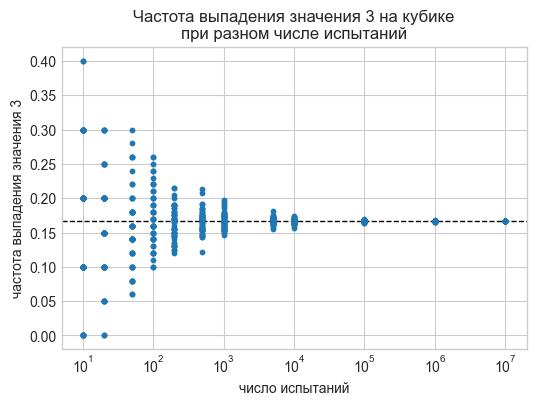

In [28]:
ns = [10, 20, 50, 100, 200, 500, 1000, 5000, 10 ** 4, 10 ** 5, 10 ** 6, 10 ** 7]

x = []
y = []

for _ in trange(50):
    for n in ns:
        x.append(n)
        y.append(dice_frequency(n))

plt.figure(dpi=100)

plt.scatter(x, y, s=10)
    
plt.axhline(y=1 / 6, c='black', ls='dashed', lw=1).set_zorder(0)
    
plt.xscale('log')

plt.title('Частота выпадения значения 3 на кубике\nпри разном числе испытаний')
plt.xlabel('число испытаний')
plt.ylabel('частота выпадения значения 3')

plt.show()

__Статистической вероятностью__ события $A$ называется его относительная частота при достаточно большом («бесконечном») количестве опытов. Вероятность события $A$ обозначается $P(A)$.

Например, при многократном повторении бросков монеты относительная частота выпадения орла может различаться, однако, вероятность выпадения орла равна $0.5$.

Свойства вероятности:

* $0 \leq P(A) \leq 1$ для любого события $A$.
* $P(\varnothing) = 0$, $P(\Omega) = 1$, где $\varnothing$ — невозможное событие, $\Omega$ — достоверное событие.
* $P(A + B) = P(A) + P(B) - P(AB)$, где $A + B$ — объединение событий (происходит хотя бы одно), а $AB$ — совместное событие (происходят оба).
* В частности, __для несовместных событий__ $P(A + B) = P(A) + P(B)$.
* $P(A) + P \left( \overline{A} \right) = 1$ для любого события $A$.

_Замечание_. Ещё раз подчеркнём, что __вероятности произвольных событий суммировать нельзя__, сперва необходимо установить несовместность событий.

### Комбинаторика

__Комбинаторика__ — раздел математики, в котором изучаются задачи выбора элементов из заданного множества и расположения их в группы по заданным правилам.

Мы изучим:
1. размещения,
2. перестановки,
3. сочетания.

__Размещение из $n$ элементов по $k$ элементов__ — это упорядоченный набор из $k$ элементов, выбранных из множества, содержащего $n$ элементов.

_Замечание_: здесь $k$ и $n$ — натуральные числа и $0 \leq k \leq n$.

Например, набор $(1, 3, 5)$ является размещением из множества $\{ 1, 2, 3, 4, 5 \}$.

В размещениях важен порядок. Так, $(1, 3, 5)$ и $(5, 1, 3)$ — разные размещения.

_Договорённость_: будем обозначать _круглыми_ скобками _упорядоченные_ наборы, а _фигурными_ — _неупорядоченные_.

Посчитаем количество размещений из $n$ по $k$. Представим себе $k$ пустых ячеек. В первой ячейке может быть любой из $n$ элементов. Во второй ячейке может быть что угодно кроме элемента из первой ячейки, т.е. всего $n - 1$ элементов. В третьей ячейке, аналогично, может быть любой из $n - 2$ элементов, и т.д.

Теперь чтобы получить число всевозможных размещений, нужно перемножить все эти числа. Итак, __количество размещений из $n$ по $k$__:
$$A_n^k = n \cdot (n - 1) \cdot (n - 2) \cdots (n - k + 1) = \dfrac{n!}{(n - k)!},$$
где $n! = n \cdot (n - 1) \cdot (n - 2) \cdots 2 \cdot 1$ — факториал.

In [29]:
def arrangements(n: int, k: int) -> int:
    """Число размещений.
    """
    
    return np.math.factorial(n) // np.math.factorial(n - k)

__Перестановкой из $n$ элементов__ называется размещение из $n$ элементов по $n$ элементов.

Чтобы посчитать количество перестановок, достаточно знать, что $0! = 1$. Итак, __количество перестановок из $n$ элементов__:
$$P_n = \dfrac{n!}{0!} =  n!$$

In [30]:
def permutations(n: int) -> int:
    """Число перестановок.
    """
    
    return np.math.factorial(n)

__Сочетание из $n$ элементов по $k$ элементов__ — это __не__упорядоченный набор из $k$ элементов, выбранных из множества, содержащего $n$ элементов.

Например, набор $\{ 1, 3, 5 \}$ является размещением из множества $\{ 1, 2, 3, 4, 5 \}$. При этом, $\{ 1, 3, 5 \}$ и $\{ 5, 1, 3 \}$ — одно и то же сочетание.

Сочетаний из $n$ по $k$ меньше, чем размещений. Насколько меньше? Из каждого сочетания размера $k$ можно получить ровно $k!$ различных размещений (переставляя элементы из сочетания всевозможными способами). Итак, __число сочетаний из $n$ по $k$__:
$$C_n^k = \dfrac{A_n^k}{P_k} =  \dfrac{n!}{k! (n - k)!}$$

In [31]:
def combinations(n: int, k: int) -> int:
    """Число сочетаний.
    """
    
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

__Пример 4__

Сколькими способами можно выбрать из колоды, состоящей из $36$ карт, $4$ карты?

Поскольку здесь важен не порядок, а лишь содержание, воспользуемся формулой сочетаний:
$$C_{36}^4 = \frac{36!}{4! \: (36 - 4)!} = \frac{36!}{4! \: 32!} = \frac{33 \cdot 34 \cdot 35 \cdot 36}{4!} = \frac{33 \cdot 34 \cdot 35 \cdot 36}{2 \cdot 3 \cdot 4} = 58905$$

In [32]:
combinations(36, 4)

58905

__Пример 5__

В магазине $20$ покупателей. Сколькими способами они могут образовать очередь из $5$ человек?

В этом примере важен порядок, в котором покупатели будут стоять в очереди, поэтому применим формулу размещений:

In [33]:
arrangements(20, 5)

1860480

__Пример 6__

Сколькими способами $5$ покупателей могут образовать очередь?

Этот пример похож на предыдущий, но есть важное отличие: не нужно выбирать $5$ покупателей из $20$. Здесь их всего $5$, и все должны присутствовать в очереди, поэтому нам нужно число перестановок:

In [34]:
permutations(5)

120

__Пример 7__

Сколькими способами можно из колоды, состоящей из $36$ карт, выбрать $5$ так, чтобы среди них оказалось от $2$ до $3$ тузов?

Искомое число можно найти по частям. Пусть число $a$ соответствует ситуации, когда среди $5$ вытянутых карт $2$ туза, а число $b$ — когда среди вытянутых карт $3$ туза. Тогда искомое число равно $a + b$.

Итак, рассмотрим первую ситуацию: среди $5$ вытянутых карт $2$ туза. Это означает, что
1. эти $2$ туза вытягиваются случайно из множества, содержащего $4$ туза,
2. оставшиеся $3$ карты вытягиваются случайно из множества, содержащего оставшиеся $32$ карты (всё кроме тузов).

Число способов достать $2$ туза из четырёх:

In [35]:
combinations(4, 2)

6

Число способов достать $3$ карты из $32$:

In [36]:
combinations(32, 3)

4960

Число $a$ равно произведению этих двух чисел:

In [37]:
a = combinations(4, 2) * combinations(32, 3)

print(a)

29760


Теперь рассмотрим ситуацию, когда тузов $3$. Соответственно, из оставшихся $32$ карт мы вытягиваем $2$.

In [38]:
b = combinations(4, 3) * combinations(32, 2)

print(b)

1984


Итак, искомое число способов:

In [39]:
a + b

31744

Сформулируем __классическое определение вероятности__. Предположим, проводится опыт с $n$ возможными исходами, причём все эти исходы равновозможны и несовместны. Такие исходы называются __элементарными событиями__.

Например, 
* Игральный кубик бросается однажды. Его выпадение каждой из $6$ сторон — все элементарные события.
* Кубик бросается дважды. Элементарные события — все пары его значений.

Рассмотрим событие $A$, которое можно «собрать» из элементарных событий (т.е. указать, какие элементарные события повлекут за собой событие $A$, а какие — нет).

Например, выпадение кубика стороной, значение которой не превышает $3$, включает в себя три элементарных события: $1$, $2$ и $3$.

__Вероятность__ события $A$:
$$P(A) = \dfrac{m}{n}$$

Здесь $n$ — общее число исходов, а $m$ — число исходов, которые влекут за собой событие $A$.

__Пример 8__

Вычислим вероятность того, что на игральной кости выпадет число $3$. Известно, что у кости шесть граней с числами от $1$ до $6$ и каждая может выпасть с равной вероятностью. По классической формуле вероятности получаем результат:
$$P(A) = \frac{m}{n} = \frac{1}{6}$$

__Пример 9__

Бросаются одновременно три игральных кубика. Какова вероятность того, что все три значения будут одинаковыми?

Всего есть $6 \cdot 6 \cdot 6$ исходов, поскольку каждый из кубиков может выпасть любой из $6$ сторон. Нас интересуют исходы, при которых все три значения совпали. Таких событий $6$. Итак,
$$P(A) = \dfrac{6}{6^3} = \dfrac{1}{36}$$

### Условная вероятность. Независимые события

Наступление одного события может влиять на наступление другого. Например, вероятность того, что за день хоть раз выпадет снег, выше зимой.

__Условная вероятность__ $P(A|B)$ — это вероятность наступления события $A$ при условии, что произошло событие $B$.
$$P(A | B) = \dfrac{P(AB)}{P(B)}$$

_Замечание_. Такое определение интуитивно напоминает классическое определение вероятности, данное выше: «доля» вероятности совместного события $AB$ относительно вероятности события $B$.

События $A$ и $B$ называются __независимыми__, если $P(A|B) = P(A)$, т.е. если наступление события $B$ не влияет на вероятность события $A$, и наоборот. Например, при многократном броске кубика результаты одного броска никак не влияют на результаты других бросков. Напротив, события «зима» и «снег» из примера выше, являются зависимыми.

_Замечание_. Зависимость событий не означает, что одно гарантированно влечёт другое. Она лишь означает, что наступление одного __меняет вероятность__ наступления другого.

__Для независимых событий__:
$$P(AB) = P(A) \cdot P(B)$$

_Замечание_. Аналогично суммированию, __вероятности произвольных событий перемножать нельзя__, сперва необходимо установить независимость событий.

__Пример 10__

Наугад выбирается точка с круглой мишени. Пусть событие $A$ заключается в выборе точки из правой половины, а событие $B$ — выбор точки из нижней половины. Являются ли эти события зависимыми?

Считаем, что $P(A) = P(B) = 1/2$. Посчитаем совместную вероятность $P(AB)$. Событие $AB$ соответствует выбору точки из правой нижней четверти, т.е. $P(AB) = 1/4$. Следовательно, 
$$P(A|B) = \dfrac{P(AB)}{P(B)} = \dfrac{\frac{1}{4}}{\frac{1}{2}} = \dfrac{1}{2}.$$

Поскольку $P(A|B) = P(A)$, заключаем, что события $A$ и $B$ независимы.

### Формула полной вероятности. Формула Байеса

Говорят, что события $H_1$, $H_2$, $\dots$, $H_n$ образуют __полную группу событий__, если они несовместны, и в ходе любого испытания одно из этих событий обязательно произойдёт.

__Формула полной вероятности__ для таких событий и произвольного события $A$:
$$P(A) = P(A | H_1) \cdot P(H_1) + P(A | H_2) \cdot P(H_2) + \dots + P(A | H_n) \cdot P(H_n).$$

В частности, для любых событий $A$ и $B$:
$$P(A) = P(A | B) \cdot P(B) + P \left( A | \overline{B} \right) \cdot P \left( \overline{B} \right)$$

__Пример 11__

Есть три одинаковые корзины. В первой лежат три красных и пять зелёных мячей, во второй — только красные, а в третьей — только зелёные мячи. Случайно выбирается одна корзина, и из неё случайным образом извлекается мяч. 

_Вопрос_: Какова вероятность того, что этот мяч — зелёный?

Решим эту задачу с помощью формулы полной вероятности. Событием $A$ будем считать то, что достали зелёный мяч, а событием $H_i$ — что выберут $i$-ю корзину. Будем считать, что ни одной из корзин не делается предпочтение. Другими словами, вероятность выбрать каждую корзину равна $P(H_i) = 1/3$.

Вероятность достать зелёный мяч при условии, что выбрана первая корзина, равен $P(A | H_1) = \dfrac{5}{3 + 5} = \dfrac{5}{8}$. При выборе второй корзины вероятность вынуть зелёный мяч равна $P(A | H_2) = 0$. В случае с третьей корзиной вероятность равна $P(A | H_3) = 1$, так как все мячи в ней — зелёные.

Подставим данные значения в формулу полной вероятности и получим ответ:
$$P(A) = \frac{5}{8} \cdot \frac{1}{3} + 0 \cdot \frac{1}{3} + 1 \cdot \frac{1}{3} = \frac{5}{24} + 0 + \frac{1}{3} = \frac{13}{24} \approx 0.5417.$$

In [40]:
13 / 24

0.5416666666666666

__Формула Байеса__ позволяет «развернуть» условную вероятность $P(A|B)$, т.е. выразить её через $P(B|A)$. По определению условной вероятности:
$$P(A|B) = \dfrac{P(AB)}{P(B)}$$
Совместную вероятность $P(AB)$ можно теперь выразить в обратном порядке:
$P(AB) = P(B|A) \cdot P(A)$

Итак, формула Байеса:
$$P(A|B) = \dfrac{P(B|A) \cdot P(A)}{P(B)}$$

__Пример 12__

Соревнования по биатлону. Один из трёх спортсменов стреляет и попадает в мишень. Вероятность такого события для первого спортсмена равна $0.2$, для второго — $0.4$, для третьего — $0.7$.

_Задача_: найти вероятность того, что стрелял третий спортсмен.

Сразу же определимся с тем, какие события мы здесь рассматриваем. Пусть событие $A$ заключается в том, что произошло попадание в мишень. Кроме того, пусть для каждого $i \in \{ 1, 2, 3 \}$ событие $B_i$ заключается в том, что выстрелил $i$-й спортсмен.

В такой формулировке наша задача — найти вероятность $P(B_3 | A)$. По формуле Байеса:
$$P(B_3|A) = \frac{P(A|B_3) \cdot P(B_3)}{P(A)}.$$

Мы можем считать, что каждому спортсмену были даны одинаковые возможности выстрелить. Поэтому можно предположить, что вероятность каждого события $B_i$ равна $P(B_i) =  1/3$.

Кроме того, нам даны вероятности попадания в мишень для каждого из спортсменов:
$$P(A|B_1) = 0.2$$
$$P(A|B_2) = 0.4$$
$$P(A|B_3) = 0.7$$

Остаётся лишь оценить безусловную вероятность попадания в мишень — $P(A)$. Для этого воспользуемся формулой полной вероятности, считая, что кроме наших трёх спортсменов выстрелить никто не мог. В таком случае
$$P(A) = P(A | B_1) \cdot P(B_1) + P(A | B_2) \cdot P(B_2) + P(A | B_3) \cdot P(B_3).$$

Имеем:
$$P(A) = 0.2 \cdot \dfrac{1}{3} + 0.4 \cdot \dfrac{1}{3} + 0.7 \cdot \dfrac{1}{3} = \dfrac{13}{30}$$

Итак, искомая вероятность:
$$P(B_3|A) = \dfrac{0.7 \cdot \frac{1}{3}}{\frac{13}{30}} = \frac{7}{13} \approx 0.5385$$

In [41]:
7 / 13

0.5384615384615384

__(Дополнительно) Наивный Байесовский классификатор__

Формула Байеса является основой для одной из моделей машинного обучения, решающих задачу классификации: Наивного Байесовского классификатора (Naive Bayes classifier). 

Допустим, имеется набор объектов $X = (x_1, x_2, \dots, x_m)$ с признаками $x_1$, $\dots$, $x_m$, причём каждому объекту $X_i$ приписана метка класса $c_i$. Байесовский классификатор основан на зависимости между двумя вероятностями:
1. $P(c \mid x_1, \dots, x_m)$, т.е. вероятность, что объект с признаками $x_1$, $\dots$, $x_m$ будет иметь метку класса $c$,
2. $P(x_1, \dots, x_m \mid c)$ — вероятность того, объект, взятый случайным образом из класса $C$ будет обладать признаками $x_1$, $\dots$, $x_m$.

Взаимосвязь между этими вероятностями подчиняется формуле Байеса:
$$P(c \mid x_1, \dots, x_m) = \dfrac{P(x_1, \dots, x_m \mid c) \cdot P(c)}{P(x_1, \dots, x_m)}$$

Собственно, Байесовский классификатор определяется следующим образом:
$$C(X) = \arg\max_c P(c \mid X),$$
т.е. объект $X$ причисляем к тому классу $c$, для которого указанная выше вероятность максимальна.

Почему классификатор называется наивным? В указанной выше формуле нет никакой наивности. Однако, оценка вероятности $P(c \mid x_1, \dots, x_m)$ без дополнительных условий является крайне сложной задачей. Для того, чтобы упростить эту оценку, на рассматриваемые признаки накладывается условие __независимости__. (Это условие и является крайне наивным, поскольку в общем случае ожидать независимости признаков нет никаких оснований.) Как мы установили выше, условие независимости даёт нам возможность разбивать вероятности вида $P(x_1, \dots, x_m \mid c)$ в произведения $P(x_1 \mid c) \cdots P(x_m \mid c)$, что изрядно упрощает вычисление.

Кроме того, в самом классификаторе также избавляются от знаменателя $P(x_1, \dots, x_m)$, поскольку данная вероятность одинакова для любого объекта и никак не влияет на вероятность принадлежать к конкретному классу. Итак, итоговая классификационная модель:
$$C(X) = \arg\max_c \left( P(c) \cdot \displaystyle\prod_X P(x_1 \mid c) \cdots P(x_m \mid c) \right)$$

Для обучения вероятностей $P(x_i \mid c)$, как правило, используют дополнительные предположения о распределении отдельных признаков, наиболее популярна модель Гауссов Байесовский классификатор (Gaussian Bayes classifier), предполагающий нормальное распределение признаков. О нормальном распределении мы поговорим на занятии 4.

### Упражнения

__Задача 1__

Подбрасываются три игральных кубика. Оцените вероятность того, что сумма значений этих кубиков не будет превышать 10.

_Подсказка_: оценкой вероятности может служить, например, относительная частота при большом числе опытов. Попробуйте реализовать наибольшее число опытов, которое позволяют ваш компьютер и ваше терпение.

__Задача 2__

Имеется колода в 52 карты. Найти число возможностей вытянуть из неё 4 карты так, чтобы среди них был хотя бы один туз.

__Задача 3__

Из 60 вопросов, входящих в экзаменационные билеты, студент знает 50. Какова вероятность того, что среди трёх наугад выбранных вопросов студент знает: а) все? б) два?

__Задача 4__

Бросается игральная кость. Пусть событие `A` - появление чётного числа, событие `B` - появление числа больше трёх. Являются ли эти события независимыми?

__Задача 5__

Допустим, имеется некоторая очень редкая болезнь (поражает 0.1% населения). Вы приходите к врачу, вам делают тест на эту болезнь, и тест оказывается положительным. Врач говорит вам, что этот тест верно выявляет 99% больных этой болезнью и всего лишь в 1% случаев даёт ложный положительный ответ.

_Вопрос_: какова вероятность, что вы действительно больны ей?

_Подсказка_: используйте формулу Байеса с раскрытием знаменателя с помощью формулы полной вероятности.